In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import chain
%matplotlib inline

In [2]:
df = pd.read_pickle('./prd_data.pkl')
# df = df.drop(['term_vectors'], axis=1).reset_index(drop=True)
len(df)

400793

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400793 entries, 0 to 400792
Data columns (total 6 columns):
m_id            400793 non-null object
best_flag       11721 non-null object
cus_grade       400793 non-null object
score           400793 non-null int64
text            400788 non-null object
sorted_terms    400292 non-null object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [4]:
df = df.dropna(subset=['sorted_terms']).reset_index(drop=True)

In [5]:
df['len_terms'] = df.sorted_terms.apply(lambda sorted_term: len(sorted_term))

In [6]:
df.head()

,m_id,best_flag,cus_grade,score,text,sorted_terms,len_terms
0,134580652,None,SS,100,디자인ㆍ품질 다좋은데 여유감이 없네요\n55싸이즈인데 팔부분이 좀 끼이네요,"[디자인, ㆍ품질, 좋, 여유, 없, 55, 싸이, 즈이, 데, 팔, 부분, 끼이]",12
1,134580617,None,SS,95,디자인은 괜찮은데 충전재가 좀 빈약하네요 ㅠㅠ,"[디자인, 괜찮, 충전, 재, 빈약, ㅠㅠ]",6
2,134580634,None,DD,100,반사이즈 작게 하니 딱 맞네요. 적당히 가볍고 처음 신어도 전혀 불편함이 없네요,"[반, 사이즈, 작, 하, 맞, 가볍, 처음, 신어, 불편, 없]",10
3,134580616,None,SS,100,사이즈가 커서 내년에 입혀야겠어요,"[사이즈, 크, 내년, 입히, 하]",5
4,134580646,None,SS,100,아이가 좋아합니다.,"[아이, 좋, 하]",3


In [7]:
# best prd_review
df_best = df.dropna(subset=['best_flag'])

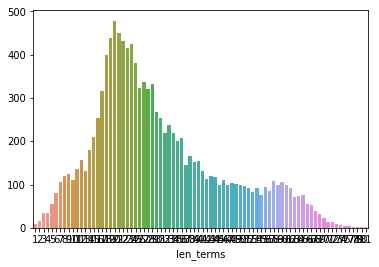

In [8]:
sns.barplot(x=df_best.groupby(by=['len_terms']).size().index, y=df_best.groupby(by=['len_terms']).size())

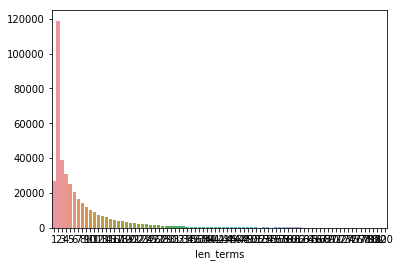

In [9]:
sns.barplot(x=df.groupby(by=['len_terms']).size().index, y=df.groupby(by=['len_terms']).size())

In [10]:
df.len_terms.describe()

count    400292.000000
mean          7.571895
std           9.405514
min           1.000000
25%           2.000000
50%           4.000000
75%           9.000000
max         100.000000
Name: len_terms, dtype: float64

In [12]:
# 1 : len_terms 5 이상 / score 100
df_positive = df.loc[(df.len_terms>5)& (df.score > 99)]
len(df_positive)

121593

In [13]:
df_positive['y'] = 1
df_positive = df_positive[['text', 'sorted_terms', 'y']]

/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_positive.sample(20)

,text,sorted_terms,y
355809,이월이지만 질 디자인 다 만족해요~~^^\n난괜찮아요~~,"[이월, 이, 지, 디자인, 만족, 나, 괜찮]",1
311286,66사이즈 입는데 오버핏이라서 55사이즈로 구매했는데\n맘에 들어요\n다만 쟈크올...,"[66, 사이즈, 입, 오버, 핏, 이, 55, 사이즈, 구매, 맘, 듣, 다만, ...",1
50173,이쁘게 잘 만들었네요.가격도 저렴하고 디자인도만족해요.,"[이쁘, 만들, 가격, 저렴, 디자인, 만족]",1
216124,생각했던거보다 너무 크네요 싸이즈표 봤는데도 감이 안와서 \n그냥 샀는데 여행용으로...,"[생각, 것, 크, 싸, 이즈, 표, 보, 가, 오, 사, 여행, 쓸, 평소, 가지...",1
162312,싸고 질도 좋고 이뻐서 다른색상으로 추가주문했어요,"[싸, 질, 좋, 이쁘, 색상, 추가, 주문]",1
168793,배송도 빠르고 상품도 맘에 듭니다.조금 무겁지만,"[배송, 빠르, 상품, 맘, 듭니다, 무겁]",1
365324,마음에쏙 듭니다 올겨울 잘입을것같숩다,"[마음, 쏙, 듭니다, 올, 겨울, 입, 것, 같, 숩]",1
282454,"우선 향 하루종일 대박 좋아요.\n오늘 배송 되는 날이라 일부러 에센스, 오일 여러...","[향, 하루, 종일, 대박, 좋, 오늘, 배송, 되, 날, 이, 에센스, 오, 일,...",1
34084,항상 쓰는 제품이고 탄탄하고 예쁘고 열전도율도 좋죠,"[쓸, 제품, 이, 탄탄, 예쁘, 열, 전도, 율, 좋]",1
341486,정장같이 격 있는자리에도입을있을듯 하네요,"[정장, 격, 있, 자리, 도입, 있, 듯, 하]",1


In [15]:
# 0 : len_terms 5 이상 / score <= 75
df_negative = df.loc[(df.len_terms>5)  & (df.score <= 75)]
len(df_negative)

12013

In [16]:
df_negative.sample(20)

,m_id,best_flag,cus_grade,score,text,sorted_terms,len_terms
295575,134798837,C,SS,55,전 가루가 들어있을줄알았더니 무슨 액체가..\n이런 이런 배송은 완전빨랐는데..\n...,"[가루, 듣, 있, 줄, 알, 액체, 배송, 빠르, 어깨, 뭉치, 구매, 보, 무겁...",18
95714,134676116,None,SS,60,새것인지 모르나 보온이 잘 되어 따듯한 밥 잘 먹는다네요,"[것, 이, 모르, 보온, 되, 따듯, 밥, 먹, 이]",9
380584,134834782,None,CC,65,건조하고 가려워요\n알러지 생기고\n정강이 긁다가 피나는줄\n원래 쓰던걸로 바꾸니까...,"[건조, 가렵, 알, 생기, 정강, 긁, 피나, 줄, 쓸, 거, 바꾸, 날, 이것,...",23
59434,134785288,None,SS,35,소매 디자인이 불편해서 입기힘듬,"[소매, 디자인, 불편, 입, 힘, 듬]",6
272249,134749836,None,SS,75,사이즈에 비해 허리는 짧고 팔은 길고 좀 별루여,"[사이즈, 비하, 허리, 짧, 팔, 길, 여]",7
45887,134608468,None,CC,40,어쩔수없어서.입게되었네요.모르고.택을.아이가.떼는바람에입게되었지만.그냥집에서입습니다.,"[어쩌, 수, 없, 입, 되, 모르, 택, 아이, 떼, 바람, 입, 되, 집, 입]",14
64654,134681855,None,SS,65,우선개봉 배송👍포장👍 체험분아침에 사용하고 후기다시 올려볼께요 내용도 깔끔 다 쓸것...,"[개봉, 배송, 👍, 포장, 👍, 체험, 아침, 사용, 후기, 올리, 보, 내용, ...",54
241905,134582436,None,SS,70,프리사이즈긴한데 좀 크네요.\n66사이즈 이상인분들이나 55중 키큰분들이 입으면 ...,"[프리, 사이즈, 이, 하, 크, 66, 사이즈, 이상, 이, 분, 55, 중, 키...",18
338497,134688121,None,SS,75,친구가 주문해달라고해서 해줬는데 기대를 너무한거같다고 하네요 그래도 무료체험분이 있...,"[친구, 주문, 달, 하, 하, 주, 기대, 것, 같, 않, 그래도, 무료, 체험,...",17
352326,134753935,None,SS,20,달라도 넘달라요\n완전 대실망입니다\n목부분이 쭈글쭈글하고...\n이러시먼 아니되오,"[다르, 다르, 완전, 실망, 이, 목, 부분, 하, 이러, 되]",10


In [17]:
df_negative['y'] = 0
df_negative = df_negative[['text', 'sorted_terms', 'y']]

/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_dataset = df_positive.append(df_negative)

In [19]:
len(df_dataset)

133606

In [20]:
df_dataset = df_dataset.rename({'sorted_terms': 'x'}, axis=1)

In [21]:
df_dataset.head()

,text,x,y
0,디자인ㆍ품질 다좋은데 여유감이 없네요\n55싸이즈인데 팔부분이 좀 끼이네요,"[디자인, ㆍ품질, 좋, 여유, 없, 55, 싸이, 즈이, 데, 팔, 부분, 끼이]",1
2,반사이즈 작게 하니 딱 맞네요. 적당히 가볍고 처음 신어도 전혀 불편함이 없네요,"[반, 사이즈, 작, 하, 맞, 가볍, 처음, 신어, 불편, 없]",1
8,뭘 입어도 속옷이 불편하길래 한번 속는셈 치고 구매해봤어요 편하기는 한데 제가 몸...,"[무엇, 입, 속, 옷, 불편, 번, 속, 셈, 치, 구매, 보, 편하, 하, 제,...",1
9,친구한테 선물받아 다~아 쓰고 딸아이랑 같이 쓰려고 주문했습니다.\n심한 건조피부라...,"[친구, 선물, 받, 쓸, 딸, 아이, 쓸, 주문, 심하, 건조, 피부, 이, 팩,...",1
10,너무 너무 편한 바지네요~제가 종아리가 너무 두꺼워서\n스키니핏을 잘 못입는데 이...,"[편하, 바지, 이, 제, 종아리, 두껍, 스키니, 핏, 입, 상품, 완전, 스키니...",1


In [22]:
df_dataset.sample(frac=1).reset_index(drop=True).to_pickle('./df_dataset.pkl')

In [23]:
text = df_dataset.x.tolist()

In [56]:
word_count = dict()

for word in chain(*text):
    if not word in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1

In [57]:
df_word_count = pd.DataFrame(data={'word':list(word_count.keys()), 'cnt':list(word_count.values())})
df_word_count = df_word_count.sort_values(by=['cnt'], ascending=False).reset_index(drop=True)

In [59]:
df_word_count.cnt.describe()

count    21528.000000
mean        73.715673
std        932.030776
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max      68239.000000
Name: cnt, dtype: float64

In [62]:
len(df_word_count.loc[df_word_count.cnt > 10])

4656

In [21]:
df_vocabulary = df_word_count.loc[df_word_count.cnt > 10].reset_index()

In [22]:
df_vocabulary = df_vocabulary.rename({'index':'idx'}, axis=1)[['idx', 'word']]
df_vocabulary['idx'] = df_vocabulary['idx'] + 1

In [23]:
vocabulary_list = list()
vocabulary_dict = dict()

In [24]:
def set_vocab(row):
    vocabulary[row.word] = row.idx
    vocabulary_inv[row.idx] = row.word

vocabulary['UNK'] = 0
vocabulary[0] = 'UNK'

df_vocabulary.apply(lambda row: set_vocab(row), axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
3776    None
3777    None
3778    None
3779    None
3780    None
3781    None
3782    None
3783    None
3784    None
3785    None
3786    None
3787    None
3788    None
3789    None
3790    None
3791    None
3792    None
3793    None
3794    None
3795    None
3796    None
3797    None
3798    None
3799    None
3800    None
3801    None
3802    None
3803    None
3804    None
3805    None
Length: 3806, dtype: object

In [25]:
def terms_to_seq(terms_list):
    seq_list = []
    for term in terms_list:
        seq_list.append(vocabulary.get(term, 0))
    return np.array(seq_list)

df_train['seq'] = df_train.sorted_terms.apply(lambda terms_list: terms_to_seq(terms_list))

In [73]:
df_train['x'] = df_train.sorted_terms.apply(lambda x: " ".join(x))


In [31]:
df_train.to_pickle('./df_train_20181203.pkl')

In [27]:
df_train = df_train.sample(frac=1).reset_index()
df_train = df_train.rename({'index': 'idx'}, axis=1)

In [33]:
df_train[['idx', 'text', 'x', 'y']].to_pickle('./df_dataset.pkl')

In [32]:
df_train[['idx', 'text', 'x', 'y']].head()

,idx,text,x,y
0,79604,샴푸도 쓰고있는데 역시 염색약도 좋아요.,"[샴푸, 쓸, 있, 역시, 염색, 약, 좋]",1
1,133769,저렴하게 알찬구매 ㅎㅎ\r\n허나가격에 3뭉치 이게 웬 횡재^^,"[저렴, 알차, 구매, 허나, 가격, 3, 뭉치, 이것, 횡재]",0
2,90265,마데카 좋아요 번들거리는것만 조금 덜하면 좋을듯요,"[데카, 좋, 번들거리, 것, 하, 좋, 듯, 이]",1
3,16246,겨울이라 조금건조했는데 촉촉하니 커버도 되는 같아 좋아요 구성이 넘 맘에 들어...,"[겨울, 이, 건조, 촉촉, 커버, 되, 같, 좋, 구성, 맘, 듣, 촉촉, 겨울,...",1
4,181982,디자인은 예쁜데 바지통은 넓고 허리부분은 좀 불편하고 구김도 있네요.. 그래도 감수...,"[디자인, 예쁘, 바지, 통, 넓, 허리, 부분, 불편, 구김, 있, 그래도, 감수...",1


In [43]:
df_dataset = pd.DataFrame()
df_train['x'] = df_train.sorted_terms.apply(lambda x: " ".join(x))
df_dataset['y'] = df_train.y
df_dataset[['x','y']].to_pickle('./df_dataset.pkl')

In [36]:
df_dataset['x_len'] = df_dataset.x.apply(lambda t: len(t))

In [51]:
df_dataset.loc[df_dataset.y == 0]

,x,y,x_len
16,빨간 색 줄 무늬 염색 때 번지 부분 있 입 전 세탁 보 물 빠지 하지만 디자인 귀...,0,51
20,상 품평 보 주문 걍 그리고 세우 지 않 불편,0,25
91,달 쓰 보 냄새 독하 하 세탁 보 ㅡ면좀나을듯,0,25
109,배송 엄 청 늦 기장 160 cm 무릎 오 가슴 사이즈 106 cm 이 하 단추 풀...,0,160
212,좋 블랙 어쩌 수 없 것 이 세무 재질 퍼지 제품 자체 실 밥 나오 있 실망 터지 ...,0,105
217,여기 사고 예쁘 주문 실망 이 귀 침 휘 오 마개 고장나 것 어이없 장사 식 하 말,0,46
242,좋 근데 몸 크 딸 주려 이 뿌요,0,18
289,싸 ㅠㅠ 바느 질 맘 상하 길 거리 살 것 차이 없 지에스 믿 사 데 ㅠ 실망,0,43
296,나 인생 인터넷 쇼핑 최악 쇼핑 ㅠㅠ처음 상품 오 않 포장 박스 찢어지 않 외 박스...,0,116
328,살 사이즈 크 입 하 허리 배 딩 이 보 사이즈 주문 그런데 허리 넉넉 편하 것 같...,0,106


In [29]:
len(df_train)

69680